**Project Objective:**

**Dataset Cleaning and Feature Engineering:**
- Cleaned and preprocessed the dataset to handle missing values, outliers, and inconsistent data.
- Performed feature engineering to create new meaningful features or transform existing ones for better model performance.

**Exploratory Data Analysis (EDA):**
- Conducted EDA to gain insights into the dataset's characteristics, including distributions, correlations, and trends.
- Visualized key relationships between variables using various plots and charts.

**Data Preparation for Machine Learning (ML):**
- Prepared the dataset for ML tasks by encoding categorical variables, scaling numerical features, and splitting the data into training and testing sets.

**ML Modeling with Random Forest and XGBoost:**
- Utilized Random Forest and XGBoost algorithms to build predictive models for laptop prices.
- Employed OPTUNA for hyperparameter optimization to enhance model performance and efficiency.

**Results Summary:**
- Evaluated model performance using metrics such as RMSE and R2 score to assess prediction accuracy.
- Compared the performance of Random Forest and XGBoost models to determine the most effective approach for price prediction.


## Table of Contents

1. [Data Cleaning](#Data-Cleaning)
   - Convert Price from Euros to INR
   - Check for duplicates
2. [Feature Engineering](#Feature-Engineering)
   - Dropped Product column because it was irrelevant for me
   - Screen Resolution
   - CPU
   - GPU
   - RAM
   - Memory
   - WEIGHT
   - Exploratory Data Analysis
   - Unveiling the Leading Laptop Brand
   - Unveiling the Most Common Laptop Type
   - Uncovering the Most Popular Laptop Size
   - Filtering Laptops by Conventional Sizes
   - Distribution of Laptop Weights
   - Distribution of Laptop Prices
   - Analyzing Laptop Price Distribution with Outliers
   - Let's Drop Extreme Outliers
   - Analyzing RAM Distribution Among Laptops
   - Exploring CPU Frequency Distribution Across Laptops
3. [Multivariate outliers detection](#Multivariate-outliers-detection)
   - Price vs RAM
   - Price vs CPU Frequency
   - Price vs inches
   - Weight vs Inches
4. [Average Price of Laptops by Company](#Average-Price-of-Laptops-by-Company)
   - Filtering Companies for Reliable Statistics
5. [Data preparation for ML modeling](#Data-preparation-for-ML-modeling)
   - Random Forest
   - Feature Importance(Random Forest)
   - XGBoost
   - Feature Importance(XGBoost)
   - Random Forest vs XGBoost


In [1]:
import pandas as pd
import numpy as np
import regex as re
import plotly.express as px
import plotly.graph_objects as go

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import optuna

from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/laptop-price/laptop_price.csv',encoding="ISO-8859-1")

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


- <b>Only two numerical columns are present in the dataset: 'inches' (indicating screen size) and 'price euros' (representing the price in euros)</b>.
- <b>It would be advantageous to convert additional columns into numerical format to facilitate further analysis.</b>
- <b>These columns encompass details about the CPU, RAM, Memory, and Weight of the laptops.</b>

In [5]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


# Data Cleaning 

In [6]:
df['laptop_ID']

0          1
1          2
2          3
3          4
4          5
        ... 
1298    1316
1299    1317
1300    1318
1301    1319
1302    1320
Name: laptop_ID, Length: 1303, dtype: int64

- <b>The laptop_id column differs from the index by a margin of 18 values at the end of the dataset, with the index ending at 1302 and laptop_id at 1320.</b>

In [7]:
for ind, laptop_ID in enumerate(df['laptop_ID'], start=1):
    if ind != laptop_ID:
        print(laptop_ID)
        break


66


In [8]:
df[df['laptop_ID']==66]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
64,66,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.86kg,690.0


- <b>After laptop_ID=66, there is a deviation between the index (adjusted by adding 1, considering Python lists start with 0) and the laptop_ID.</b>
- <b>Lets drop laptop_ID.</b> 

In [9]:
df = df.drop('laptop_ID',axis=1)

- <b>Let's update the column names to lowercase for consistency.</b>

In [10]:
df = df.rename(columns=str.lower)

In [11]:
df.columns

Index(['company', 'product', 'typename', 'inches', 'screenresolution', 'cpu',
       'ram', 'memory', 'gpu', 'opsys', 'weight', 'price_euros'],
      dtype='object')

### Convert Price from Euros to INR

In [12]:
df = pd.DataFrame(df)

# Exchange rate
exchange_rate = 90.46

# Convert 'price_euros' to INR
df['price'] = df['price_euros'] * exchange_rate

df = df.drop(['price_euros'], axis=1)
df


,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,121188.3574
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,81318.1124
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,52014.5000
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,229537.7270
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,163153.6560
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,57713.4800
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,135599.5400
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,20715.3400
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,69111.4400


## Check for duplicates

In [13]:
df[df.duplicated()]

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
1275,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,65945.3400
1276,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,41521.1400
1277,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,26142.9400
1278,Dell,Inspiron 3552,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,34284.3400
1279,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,81323.5400
1280,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,49752.0954
1281,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,72909.8554
1282,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,18906.1400
1283,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,65160.1472
1284,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,57713.4800


In [14]:
drop_duplicate = list(range(1289, 1303))
df = df.drop(drop_duplicate)
df

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,121188.3574
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,81318.1124
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,52014.5000
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,229537.7270
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,163153.6560
...,...,...,...,...,...,...,...,...,...,...,...,...
1284,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,57713.4800
1285,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,135599.5400
1286,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,20715.3400
1287,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,69111.4400


In [15]:
#df = df.drop_duplicates()

In [16]:
df['company'].value_counts()

company
Dell         294
Lenovo       293
HP           271
Asus         155
Acer         102
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [17]:
costliest_laptops = df[df['company'] == 'Dell']
top_10_laptops = costliest_laptops.nlargest(10, 'price')
top_10_laptops

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
723,Dell,Alienware 17,Gaming,17.3,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,32GB,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36kg,331029.3240
780,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32GB,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070M,Windows 10,4.42kg,324642.8480
955,Dell,Alienware 17,Gaming,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36kg,285310.8400
968,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,284858.5400
659,Dell,Alienware 17,Gaming,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,32GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,284711.0902
841,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,277973.6294
204,Dell,Precision 7520,Workstation,15.6,4K Ultra HD 3840x2160,Intel Xeon E3-1505M V6 3GHz,16GB,256GB SSD + 1TB HDD,Nvidia Quadro M1200,Windows 10,2.8kg,276355.3000
530,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,272535.1742
297,Dell,Precision 7720,Workstation,17.3,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,16GB,256GB SSD,Nvidia Quadro M1200,Windows 10,3.42kg,260964.4356
758,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,259528.8354


In [18]:
df[df['company'] == 'Acer']

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,36184.000
9,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,69654.200
36,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 7130U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Linux,2.1kg,33198.820
43,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,256GB SSD,Intel UHD Graphics 620,Windows 10,2.2kg,61693.720
51,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,2.2kg,76076.860
...,...,...,...,...,...,...,...,...,...,...,...,...
1216,Acer,E5 774G,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Nvidia GeForce 940MX,Windows 10,3.3kg,54095.080
1219,Acer,SP714-51 (i7-7Y75/8GB/256GB/FHD/W10),2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7Y75 1.3GHz,8GB,256GB SSD,Intel HD Graphics 615,Windows 10,1.2kg,103938.540
1242,Acer,Aspire ES1-572,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,500GB HDD,Intel HD Graphics 520,Linux,2.4kg,32728.428
1263,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,26142.940


<Axes: title={'center': 'price'}>

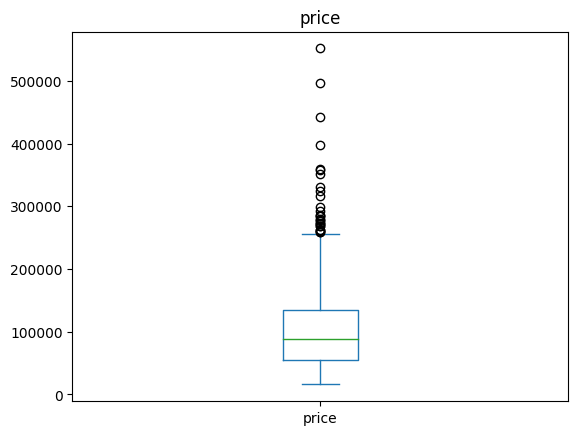

In [19]:
df['price'].plot(kind='box',title='price')

# Feature Engineering

#### Dropped Product column because it was irrelevant for me

In [20]:
#df['product'].value_counts()
df = df.drop('product',axis=1)

### Screen Resolution

In [21]:
df[['screen_width', 'screen_height']] = df['screenresolution'].str.extract(r'(\d+)x(\d+)')

df['screen_width'] = df['screen_width'].astype(int)
df['screen_height'] = df['screen_height'].astype(int)

df = df.drop('screenresolution', axis=1)
df

,company,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,screen_width,screen_height
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,121188.3574,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,81318.1124,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,52014.5000,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,229537.7270,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,163153.6560,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
1284,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,57713.4800,1920,1080
1285,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,135599.5400,3200,1800
1286,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,20715.3400,1366,768
1287,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,69111.4400,1366,768


## CPU

In [22]:
df['cpu'].value_counts()

cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       133
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i5 2.9GHz               1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v5 2.9GHz      1
Name: count, Length: 118, dtype: int64

- <b>Extracting CPU Brand:</b>Using regular expressionto match  the first word in the 'cpu' column and creating a new column 'cpu_brand'.
- <b>Extracting CPU Frequency:</b> Using regular expression to match the numeric part with optional decimal and 'GHz' unit, creating a new column 'cpu_freq(GHz)'.
- <b>Cleaning CPU Frequency:</b> Removing 'GHz' from the 'cpu_freq(GHz)' column to leave only the numeric part.
- <b>Converting to Float:</b> Converting the 'cpu_freq(GHz)' column to float data type for numerical analysis.
- <b>Dropping Original Column:</b> Dropping the original 'cpu' column since relevant information has been extracted into new columns.

In [23]:
df['cpu_brand'] = df['cpu'].str.extract(r'^(\w+)')
df['cpu_freq(GHz)'] = df['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)')
df['cpu_freq(GHz)'] = df['cpu_freq(GHz)'].str.replace('GHz', '')
df['cpu_freq(GHz)'] = df['cpu_freq(GHz)'].astype(float)
df = df.drop('cpu',axis=1)
df

,company,typename,inches,ram,memory,gpu,opsys,weight,price,screen_width,screen_height,cpu_brand,cpu_freq(GHz)
0,Apple,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,121188.3574,2560,1600,Intel,2.3
1,Apple,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,81318.1124,1440,900,Intel,1.8
2,HP,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,52014.5000,1920,1080,Intel,2.5
3,Apple,Ultrabook,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,229537.7270,2880,1800,Intel,2.7
4,Apple,Ultrabook,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,163153.6560,2560,1600,Intel,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,Lenovo,2 in 1 Convertible,14.0,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,57713.4800,1920,1080,Intel,2.5
1285,Lenovo,2 in 1 Convertible,13.3,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,135599.5400,3200,1800,Intel,2.5
1286,Lenovo,Notebook,14.0,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,20715.3400,1366,768,Intel,1.6
1287,HP,Notebook,15.6,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,69111.4400,1366,768,Intel,2.5


In [24]:
df["cpu_brand"].value_counts()

cpu_brand
Intel      1227
AMD          61
Samsung       1
Name: count, dtype: int64

In [25]:
df[df['cpu_brand']=='Samsung']

,company,typename,inches,ram,memory,gpu,opsys,weight,price,screen_width,screen_height,cpu_brand,cpu_freq(GHz)
1191,Samsung,2 in 1 Convertible,12.3,4GB,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15kg,59613.14,2400,1600,Samsung,2.0


In [26]:
df=df.drop(1191)

## GPU

- <b>Extracting GPU Brand:</b> Using a regular expression pattern to extract the GPU brand from the 'gpu' column. This pattern captures the first word (brand name) in the string.
- <b>Creating New Column:</b> Storing the extracted GPU brand in a new column named 'gpu_brand'.
- <b>Dropping Original Column:</b> Removing the original 'gpu' column as the brand information has been extracted and stored separately.

In [27]:
df['gpu_brand'] = df['gpu'].str.extract(r'^(\w+)')

df = df.drop('gpu',axis=1)
df

,company,typename,inches,ram,memory,opsys,weight,price,screen_width,screen_height,cpu_brand,cpu_freq(GHz),gpu_brand
0,Apple,Ultrabook,13.3,8GB,128GB SSD,macOS,1.37kg,121188.3574,2560,1600,Intel,2.3,Intel
1,Apple,Ultrabook,13.3,8GB,128GB Flash Storage,macOS,1.34kg,81318.1124,1440,900,Intel,1.8,Intel
2,HP,Notebook,15.6,8GB,256GB SSD,No OS,1.86kg,52014.5000,1920,1080,Intel,2.5,Intel
3,Apple,Ultrabook,15.4,16GB,512GB SSD,macOS,1.83kg,229537.7270,2880,1800,Intel,2.7,AMD
4,Apple,Ultrabook,13.3,8GB,256GB SSD,macOS,1.37kg,163153.6560,2560,1600,Intel,3.1,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,Lenovo,2 in 1 Convertible,14.0,4GB,128GB SSD,Windows 10,1.8kg,57713.4800,1920,1080,Intel,2.5,Intel
1285,Lenovo,2 in 1 Convertible,13.3,16GB,512GB SSD,Windows 10,1.3kg,135599.5400,3200,1800,Intel,2.5,Intel
1286,Lenovo,Notebook,14.0,2GB,64GB Flash Storage,Windows 10,1.5kg,20715.3400,1366,768,Intel,1.6,Intel
1287,HP,Notebook,15.6,6GB,1TB HDD,Windows 10,2.19kg,69111.4400,1366,768,Intel,2.5,AMD


In [28]:
df["gpu_brand"].value_counts()

gpu_brand
Intel     713
Nvidia    398
AMD       177
Name: count, dtype: int64

## RAM

- <b>Removing 'GB' from RAM:</b> Removing the 'GB' suffix from the 'ram' column to retain only the numeric part.
- <b>Converting to Integer:</b> Converting the 'ram' column to integer data type to represent the RAM size in gigabytes accurately.
- <b>Renaming the Column:</b> Renaming the 'ram' column to 'ram(GB)' to indicate that the values represent RAM size in gigabytes.

In [29]:
df['ram'] = df['ram'].str.replace('GB', '').astype(int)
df = df.rename(columns={'ram': 'ram(GB)'})

df

,company,typename,inches,ram(GB),memory,opsys,weight,price,screen_width,screen_height,cpu_brand,cpu_freq(GHz),gpu_brand
0,Apple,Ultrabook,13.3,8,128GB SSD,macOS,1.37kg,121188.3574,2560,1600,Intel,2.3,Intel
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,macOS,1.34kg,81318.1124,1440,900,Intel,1.8,Intel
2,HP,Notebook,15.6,8,256GB SSD,No OS,1.86kg,52014.5000,1920,1080,Intel,2.5,Intel
3,Apple,Ultrabook,15.4,16,512GB SSD,macOS,1.83kg,229537.7270,2880,1800,Intel,2.7,AMD
4,Apple,Ultrabook,13.3,8,256GB SSD,macOS,1.37kg,163153.6560,2560,1600,Intel,3.1,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,Lenovo,2 in 1 Convertible,14.0,4,128GB SSD,Windows 10,1.8kg,57713.4800,1920,1080,Intel,2.5,Intel
1285,Lenovo,2 in 1 Convertible,13.3,16,512GB SSD,Windows 10,1.3kg,135599.5400,3200,1800,Intel,2.5,Intel
1286,Lenovo,Notebook,14.0,2,64GB Flash Storage,Windows 10,1.5kg,20715.3400,1366,768,Intel,1.6,Intel
1287,HP,Notebook,15.6,6,1TB HDD,Windows 10,2.19kg,69111.4400,1366,768,Intel,2.5,AMD


In [30]:
df['ram(GB)'].value_counts()

ram(GB)
8     616
4     370
16    199
6      38
12     25
2      19
32     17
24      3
64      1
Name: count, dtype: int64

In [31]:
df[df['ram(GB)'] == 64]

,company,typename,inches,ram(GB),memory,opsys,weight,price,screen_width,screen_height,cpu_brand,cpu_freq(GHz),gpu_brand
1066,Asus,Gaming,17.3,64,1TB SSD,Windows 10,3.58kg,359578.5,1920,1080,Intel,2.7,Nvidia


In [32]:
df = df.drop(1066)

## Memory

- <b>Splitting Memory Information:</b> Splitting the 'memory' column based on the space (" ") delimiter to separate the memory size and memory type.
- <b>Extracting Size and Type:</b> Using the .str.get() method to extract the first (size) and second (type) parts after splitting.
- <b>Creating New Columns:</b> Storing the extracted memory size in the 'memory_size' column and the memory type in the 'memory_type' column.
- <b>Dropping Original Column:</b> Removing the original 'memory' column as the size and type information has been extracted and stored separately.

In [33]:
df['memory_size'] = df['memory'].str.split(" ").str.get(0)
df['memory_type'] = df['memory'].str.split(" ").str.get(1)
df = df.drop('memory',axis=1)

- <b>Extracting Memory Size:</b> Iterate through each value in the 'memory_size' column.
- <b>Converting TB to GB:</b> Check if the memory size contains "GB" or "TB". If it contains "GB", simply remove "GB" and convert to integer. If it contains "TB", remove "TB", convert to float, multiply by 1000 to convert TB to GB, and then convert to integer.
- <b>Updating Column:</b> Replace the 'memory_size' column with the converted values.
- <b>Converting to Integer:</b> Ensure that the 'memory_size' column is of integer type for consistency and proper data representation.

In [34]:
j = []
for i in df['memory_size']:
    if "GB" in i:
        j.append(int(i.replace("GB","")))
    else:
        j.append(float(i.replace("TB",""))*float(1000))
df['memory_size'] = j
df['memory_size'] = df['memory_size'].astype(int)

df

,company,typename,inches,ram(GB),opsys,weight,price,screen_width,screen_height,cpu_brand,cpu_freq(GHz),gpu_brand,memory_size,memory_type
0,Apple,Ultrabook,13.3,8,macOS,1.37kg,121188.3574,2560,1600,Intel,2.3,Intel,128,SSD
1,Apple,Ultrabook,13.3,8,macOS,1.34kg,81318.1124,1440,900,Intel,1.8,Intel,128,Flash
2,HP,Notebook,15.6,8,No OS,1.86kg,52014.5000,1920,1080,Intel,2.5,Intel,256,SSD
3,Apple,Ultrabook,15.4,16,macOS,1.83kg,229537.7270,2880,1800,Intel,2.7,AMD,512,SSD
4,Apple,Ultrabook,13.3,8,macOS,1.37kg,163153.6560,2560,1600,Intel,3.1,Intel,256,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,Lenovo,2 in 1 Convertible,14.0,4,Windows 10,1.8kg,57713.4800,1920,1080,Intel,2.5,Intel,128,SSD
1285,Lenovo,2 in 1 Convertible,13.3,16,Windows 10,1.3kg,135599.5400,3200,1800,Intel,2.5,Intel,512,SSD
1286,Lenovo,Notebook,14.0,2,Windows 10,1.5kg,20715.3400,1366,768,Intel,1.6,Intel,64,Flash
1287,HP,Notebook,15.6,6,Windows 10,2.19kg,69111.4400,1366,768,Intel,2.5,AMD,1000,HDD


In [35]:
df['memory_type'].value_counts()

memory_type
SSD       839
HDD       367
Flash      72
Hybrid      9
Name: count, dtype: int64

## WEIGHT

In [36]:
df['weight'].value_counts()

weight
2.2kg     119
2.1kg      58
2.4kg      43
2.3kg      39
2.5kg      38
         ... 
4.7kg       1
1.55kg      1
1.18kg      1
2.72kg      1
4.0kg       1
Name: count, Length: 179, dtype: int64

- <b>Removing 'kg' Suffix:</b> Remove the 'kg' suffix from each value in the 'weight' column using the str.replace() method.
- <b>Converting to Float:</b> Convert the cleaned weight values to float data type using the astype(float) method.
- <b>Renaming Column:</b> Rename the 'weight' column to 'weight(kg)' for clarity and consistency using the rename() method.

In [37]:
df['weight'] = df['weight'].str.replace('kg', '').astype(float)
df = df.rename(columns={'weight': 'weight(kg)'})
df

,company,typename,inches,ram(GB),opsys,weight(kg),price,screen_width,screen_height,cpu_brand,cpu_freq(GHz),gpu_brand,memory_size,memory_type
0,Apple,Ultrabook,13.3,8,macOS,1.37,121188.3574,2560,1600,Intel,2.3,Intel,128,SSD
1,Apple,Ultrabook,13.3,8,macOS,1.34,81318.1124,1440,900,Intel,1.8,Intel,128,Flash
2,HP,Notebook,15.6,8,No OS,1.86,52014.5000,1920,1080,Intel,2.5,Intel,256,SSD
3,Apple,Ultrabook,15.4,16,macOS,1.83,229537.7270,2880,1800,Intel,2.7,AMD,512,SSD
4,Apple,Ultrabook,13.3,8,macOS,1.37,163153.6560,2560,1600,Intel,3.1,Intel,256,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,Lenovo,2 in 1 Convertible,14.0,4,Windows 10,1.80,57713.4800,1920,1080,Intel,2.5,Intel,128,SSD
1285,Lenovo,2 in 1 Convertible,13.3,16,Windows 10,1.30,135599.5400,3200,1800,Intel,2.5,Intel,512,SSD
1286,Lenovo,Notebook,14.0,2,Windows 10,1.50,20715.3400,1366,768,Intel,1.6,Intel,64,Flash
1287,HP,Notebook,15.6,6,Windows 10,2.19,69111.4400,1366,768,Intel,2.5,AMD,1000,HDD


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1287 entries, 0 to 1288
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company        1287 non-null   object 
 1   typename       1287 non-null   object 
 2   inches         1287 non-null   float64
 3   ram(GB)        1287 non-null   int64  
 4   opsys          1287 non-null   object 
 5   weight(kg)     1287 non-null   float64
 6   price          1287 non-null   float64
 7   screen_width   1287 non-null   int64  
 8   screen_height  1287 non-null   int64  
 9   cpu_brand      1287 non-null   object 
 10  cpu_freq(GHz)  1287 non-null   float64
 11  gpu_brand      1287 non-null   object 
 12  memory_size    1287 non-null   int64  
 13  memory_type    1287 non-null   object 
dtypes: float64(4), int64(4), object(6)
memory usage: 150.8+ KB


In [39]:
df.to_csv('laptop-clean.csv', index=False)

## Exploratory Data Analysis

In [40]:
df1=pd.read_csv('laptop-clean.csv')
df1.head()

,company,typename,inches,ram(GB),opsys,weight(kg),price,screen_width,screen_height,cpu_brand,cpu_freq(GHz),gpu_brand,memory_size,memory_type
0,Apple,Ultrabook,13.3,8,macOS,1.37,121188.3574,2560,1600,Intel,2.3,Intel,128,SSD
1,Apple,Ultrabook,13.3,8,macOS,1.34,81318.1124,1440,900,Intel,1.8,Intel,128,Flash
2,HP,Notebook,15.6,8,No OS,1.86,52014.5000,1920,1080,Intel,2.5,Intel,256,SSD
3,Apple,Ultrabook,15.4,16,macOS,1.83,229537.7270,2880,1800,Intel,2.7,AMD,512,SSD
4,Apple,Ultrabook,13.3,8,macOS,1.37,163153.6560,2560,1600,Intel,3.1,Intel,256,SSD


In [41]:
#df_clean=df1.copy()

## Unveiling the Leading Laptop Brand

In [42]:
company_counts = df1['company'].value_counts().reset_index()
company_counts.columns = ['company', 'count']

fig = px.bar(company_counts, x='company', y='count', color='company',
             title='Number of laptops by brands',
             labels={'company': 'Company', 'count': 'Number of Laptops'},
             text='count',
             color_discrete_sequence=px.colors.sequential.Aggrnyl)

fig.update_xaxes(tickangle=320)

fig.update_traces(textposition='outside')

fig.update_layout(template='simple_white')

fig.show()


- <b>Majority of laptops in the dataset are manufactured by Dell, Lenovo, and HP, indicating their significant presence and popularity.</b>
- <b>In contrast, brands like Huawei, LG, and Fujitsu contribute the fewest number of laptops to the dataset, suggesting a relatively smaller market share or limited representation compared to the dominant brands.</b>

## Unveiling the Most Common Laptop Type

In [43]:
typename_counts = df1['typename'].value_counts().reset_index()
typename_counts.columns = ['typename', 'count']


fig = px.bar(typename_counts, x='typename', y='count', color='typename',
             title='Laptop Types',
             labels={'typename': 'Type name', 'count': 'Number of Laptops'},
             text='count',
             category_orders={'typename': df['typename'].value_counts().index},
             color_discrete_sequence=px.colors.sequential.Aggrnyl)

fig.update_xaxes(tickangle=320)

fig.update_traces(textposition='outside')

fig.update_layout(template='simple_white')

fig.show()


In [44]:
print('Most laptops are notebooks, which make {:.2f}% of the total laptops'.format(len(df[df['typename']=='Notebook'])*100/len(df)))

Most laptops are notebooks, which make 55.71% of the total laptops


## Uncovering the Most Popular Laptop Size

In [45]:
screen_size = df1['inches'].value_counts().reset_index()
screen_size.columns = ['inches', 'count']

screen_size['inches'] = screen_size['inches'].astype(str)

screen_size = screen_size.sort_values(by='inches')

fig = px.bar(screen_size, x='inches', y='count', color='inches',
             title='Laptop Screen Size (inches)',
             labels={'inches': 'Screen Size (inches)', 'count': 'Number of Laptops'},
             text='count',
             color_discrete_sequence=px.colors.sequential.Aggrnyl)

custom_order = list(screen_size['inches'])
fig.update_xaxes(categoryorder='array', categoryarray=custom_order)

fig.update_traces(textposition='outside', width=0.5) 

fig.update_layout(template='simple_white', bargap=0.1, bargroupgap=0.2)  

fig.show()


In [46]:
print('Most laptops have 15.6 inches, which make {:.2f}% of the total laptops'.format(len(df[df['inches']==15.6])*100/len(df)))

Most laptops have 15.6 inches, which make 50.97% of the total laptops


#### Filtering Laptops by Conventional Sizes

In [47]:
inches_list = df['inches'].value_counts().index[:6].tolist()
inches_list

[15.6, 14.0, 17.3, 13.3, 12.5, 11.6]

- <b>We will retain laptops that fall into one of these six screen size categories.</b>

In [48]:
df1 = df1[df1['inches'].isin(inches_list)]

In [49]:
df1['inches'].value_counts()

inches
15.6    656
14.0    195
17.3    163
13.3    162
12.5     39
11.6     32
Name: count, dtype: int64

In [50]:
screen_size = df1['inches'].value_counts().reset_index()
screen_size.columns = ['inches', 'count']

screen_size['inches'] = screen_size['inches'].astype(str)

screen_size = screen_size.sort_values(by='inches')

fig = px.bar(screen_size, x='inches', y='count', color='inches',
             title='Laptop Screen Size (inches)',
             labels={'inches': 'Screen Size (inches)', 'count': 'Number of Laptops'},
             text='count',
             color_discrete_sequence=px.colors.sequential.Aggrnyl)

custom_order = list(screen_size['inches'])
fig.update_xaxes(categoryorder='array', categoryarray=custom_order)

fig.update_traces(textposition='outside', width=0.5) 

fig.update_layout(template='simple_white', bargap=0.1, bargroupgap=0.2)  

fig.show()


In [51]:
print('We removed {} outliers!'.format(len(df)-len(df1)))

We removed 40 outliers!


## Distribution of Laptop Weights

In [52]:
def num_plot(df, col, title, unit):
    
    fig = px.histogram(df1, x=col, marginal="box",
                       title=title,
                       labels={col: f'{col} ({unit})'},
                       color_discrete_sequence=px.colors.sequential.Viridis)
    
    mean_value = np.round(df[col].mean(),1)
    median_value = np.round(df[col].median(),1)
    mode_value = df[col].mode().iloc[0]
    
    max_count = df[col].value_counts().max()
 
    fig.add_trace(go.Scatter(x=[mean_value, mean_value], y=[0, max_count * 1.5], mode="lines", name=f'Mean: {mean_value:.2f}', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=[median_value, median_value], y=[0, max_count * 1.5], mode="lines", name=f'Median: {median_value}', line=dict(color='green')))
    fig.add_trace(go.Scatter(x=[mode_value, mode_value], y=[0, max_count * 1.5], mode="lines", name=f'Mode: {mode_value}', line=dict(color='blue')))

    fig.update_traces(marker=dict(line=dict(color='white', width=1)))

    fig.update_layout(template='simple_white',bargap=0)

    fig.show()

num_plot(df1, 'weight(kg)', 'Weight Distribution', 'kg')


## Distribution of Laptop Prices

In [53]:
num_plot(df1, 'price', 'Price Distribution', '₹')

### Analyzing Laptop Price Distribution with Outliers

In [54]:
fig = px.box(df1, x='price', title='Box Plot of Price')

fig.show()

- <b>It appears that there are laptops valued at over 450,000 INR.</b>

In [55]:
len(df1[df1['price']>4.5e5])

2

### Let's Drop Extreme Outliers

In [56]:
df1 = df1[df1['price']<4.5e5].reset_index(drop=True)

In [57]:
fig = px.box(df1, x='price', title='Box Plot of Price')

fig.show()

## Analyzing RAM Distribution Among Laptops

In [58]:
num_plot(df1, 'ram(GB)','RAM distribution','GB')

In [59]:
print('Most laptops have 8 GB RAM, which make {:.2f}% of the total laptops'.format(len(df[df['ram(GB)']==8])*100/len(df)))

Most laptops have 8 GB RAM, which make 47.86% of the total laptops


## Exploring CPU Frequency Distribution Across Laptops

In [60]:
num_plot(df1, 'cpu_freq(GHz)','CPU freq distribution','GHz')

In [61]:
print('Most laptops have 2.5 GHz CPU, which make {}% of the total laptops'.format(np.round(len(df[df['cpu_freq(GHz)']==2.5])*100/len(df),2)))

Most laptops have 2.5 GHz CPU, which make 22.46% of the total laptops


























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































# Multivariate outliers detection

## Price vs RAM

In [62]:
def lr_plot(df, col_x, col_y):
    # Calculate linear regression parameters
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x], df[col_y])

    # Scatter plot
    scatter_trace = go.Scatter(
        x=df[col_x],
        y=df[col_y],
        mode='markers',
        marker=dict(color='#0d98ba'),
        name='Data Points'
    )

    # Regression line
    line_trace = go.Scatter(
        x=df[col_x],
        y=slope * df[col_x] + intercept,
        mode='lines',
        line=dict(color='#0d98ba', width=3),
        name=f'Regression Line: y={slope:.1f}x+{intercept:.1f}'
    )

    # Create layout
    layout = go.Layout(
        title=f'{col_y} VS {col_x}',
        legend=dict(x=0, y=1, traceorder='normal', orientation='h'),
        margin=dict(l=50, r=50, b=50, t=50),
    )

  
    # Create figure
    fig = go.Figure(data=[scatter_trace, line_trace], layout=layout)
    
    fig.update_yaxes(tickformat='₹,.0f')
    
    fig.update_layout(template='simple_white')

    # Show the plot
    fig.show()

    return slope, intercept

# Example usage
# Assuming df is your DataFrame and 'col_x', 'col_y' are your column names
slope, intercept = lr_plot(df1, 'ram(GB)','price')


## Price vs CPU Frequency

In [63]:
slope, intercept = lr_plot(df1,'cpu_freq(GHz)','price')

## Price vs inches

In [64]:
slope, intercept = lr_plot(df1,'inches','price')

## Weight vs Inches

In [65]:
slope, intercept = lr_plot(df1,'inches','weight(kg)')

# Average Price of Laptops by Company

In [66]:
df['company'].value_counts()

company
Dell         294
Lenovo       293
HP           271
Asus         154
Acer         102
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

## Filtering Companies for Reliable Statistics
- <b>Some companies in the dataset have fewer than 10 laptops, which may not provide statistically significant insights.</b>
- <b>Therefore, we will focus on companies with at least 20 laptops in the dataset to ensure reliable statistical analysis.</b>

In [67]:
import plotly.express as px
import pandas as pd

# Assuming df_clean is your DataFrame
top_companies = df1['company'].value_counts().index[:8]
filtered_df = df1[df1['company'].isin(top_companies)]

# Calculate average prices per brand
average_prices = filtered_df.groupby('company')['price'].mean().reset_index()

average_prices['price'] = average_prices['price'].round()

# Create Plotly bar plot
fig = px.bar(average_prices, x='company', y='price',
             title='Average Prices of Laptops per Brand (Top 8)',
             labels={'price': 'Average Price'},
             color='company',
             color_discrete_sequence=px.colors.sequential.Aggrnyl,
             text='price', height=500)

# Customize y-axis tick format to display values in INR
fig.update_yaxes(tickformat='₹,.0f')

fig.update_traces(texttemplate='₹ %{text}', textposition='outside')

fig.update_layout(template='simple_white')

# Customize layout
fig.update_xaxes(tickangle=320)
fig.update_layout(showlegend=False)

# Show the plot
fig.show()


- <b>MSI laptops</b> are on average the most expensive, with an average price of <b>154,571 INR</b>.
- <b>Apple laptops</b> are the second most expensive, with an average price of <b>124,945 INR</b>.
- <b>Toshiba laptops</b> rank third in terms of average price, standing at <b>114,686 INR</b>.
- <b>Acer laptops</b> are the most affordable among all the other brands, with an average price of <b>56,998 INR</b>.
- Laptops from <b>Dell, HP, Lenovo, and Asus</b> have average prices of <b>108,092 INR, 97,337 INR, 98,247 INR, and 99,516 INR</b> respectively.

# Data preparation for ML modeling

In [68]:
num_plot(df1, 'price', 'Price Distribution','₹')

In [69]:
from scipy.stats import skew

# Example of calculating skewness
skewness = skew(df1['price'])
print(f"Skewness: {skewness}")


Skewness: 1.2146900415516986


- <b>A skewness value of 1.214 indicates that the distribution of the data is positively skewed, meaning that the tail of the distribution extends to the right, and the bulk of the data is concentrated on the left side of the distribution.</b>

In [70]:
df1['price']=np.log(df1['price'])

- <b>After evaluating various transformation techniques including Box-Cox, Yeo-Johnson, cube root, square root, and logarithmic transformations on the right-skewed target variable 'price', it was observed that the logarithmic transformation yielded the most favorable results. Therefore, to enhance the prediction performance of the algorithms, we opted for the logarithmic transformation.</b>

In [71]:
fig = px.histogram(df1, x='price', title='Price Distribution',
                   labels={'price': 'Price'},
                   template='plotly_white',
                   nbins=50) 

fig.update_layout(bargap=0.1)

# Show the plot
fig.show()

In [72]:
from scipy.stats import skew

# Example of calculating skewness
skewness = skew(df1['price'])
print(f"Skewness: {skewness}")


Skewness: -0.19536388694808618


- <b>After applying the log transformation, the skewness value of -0.195 indicates a slight negative skewness. This suggests that the log-transformed data is slightly skewed to the left. However, compared to the original data, the skewness has decreased, indicating that the log transformation has helped reduce the skewness and make the distribution more symmetric. Although it is not perfectly normal, it is closer to a normal distribution compared to the original data.</b>

In [73]:
df1[df1['cpu_freq(GHz)'].isnull()]

,company,typename,inches,ram(GB),opsys,weight(kg),price,screen_width,screen_height,cpu_brand,cpu_freq(GHz),gpu_brand,memory_size,memory_type


## Random Forest

In addition to splitting the data into training and testing sets and fitting a Random Forest model, several preprocessing steps were performed:

- <b>Categorical variables such as 'company', 'typename', 'opsys', 'cpu_brand', 'gpu_brand', and 'memory_type' were one-hot encoded to convert them into a numerical format suitable for machine learning algorithms.</b>
- <b>A column transformer was created to apply one-hot encoding to categorical features while keeping numerical features unchanged.</b>
- <b>The Random Forest regressor was instantiated with 100 estimators, a maximum depth of 100, and a maximum of 15 features to split on.</b>
- <b>A pipeline was constructed to streamline the preprocessing steps and the Random Forest model fitting process.</b>
- <b>The pipeline was trained on the training data, and predictions were made on the testing data.</b>
- <b>Mean squared error (MSE) and R-squared (R2) scores were computed to evaluate the performance of the Random Forest model.</b>

In [74]:
X = df1.loc[:,['company', 'typename', 'inches', 'ram(GB)', 'opsys', 'weight(kg)',
               'screen_width', 'screen_height', 'cpu_brand', 'cpu_freq(GHz)',
               'gpu_brand', 'memory_size', 'memory_type']]

y = df1.loc[:,['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Optionally, create a additional validation to monitor overfitting
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(X[['company', 'typename', 'opsys', 'cpu_brand', 'gpu_brand', 'memory_type']])
col_trans = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_), ['company', 'typename', 'opsys', 'cpu_brand', 'gpu_brand', 'memory_type']),
    remainder="passthrough"
)

rf = RandomForestRegressor(n_estimators=100, max_depth=100, max_features=15)

pipe_rf = make_pipeline(col_trans, rf)

pipe_rf.fit(X_train, y_train.values.ravel())

y_pred_rf = pipe_rf.predict(X_test)

mse_rf = mean_squared_error(np.exp(y_test), np.exp(y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("RMSE using Random Forest: ₹ {:.2f}".format(np.sqrt(mse_rf)))
print("R2 using Random Forest: {:.2f}%".format(r2_rf * 100))



RMSE using Random Forest: ₹ 23028.89
R2 using Random Forest: 90.90%


## Feature Importance(Random Forest)

- <b>After fitting the column transformer on the training data and obtaining the transformed feature names, the feature importances of the Random Forest model were extracted.</b>
- <b>The feature importances were sorted in descending order to identify the most influential features in predicting laptop prices.</b>
- <b>A horizontal bar plot was generated using Plotly Express to visualize the feature importances, providing insights into which features have the greatest impact on the model's predictions.</b>

In [75]:
col_trans.fit(X_train)

feature_names = col_trans.get_feature_names_out(input_features=X.columns)

importances = pipe_rf.named_steps['randomforestregressor'].feature_importances_

feat_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

feat_df = feat_df.sort_values(by='importance', ascending=False)

fig = px.bar(feat_df, y='feature', x='importance', color='importance',
             title='Feature Importance for Laptop Price Prediction(Random Forest)',
             labels={'feature': 'Feature', 'importance': 'Importance'},
             orientation='h', 
             color_continuous_scale='Viridis')

fig.show()


## XGBoost

- <b>Utilized Optuna, a hyperparameter optimization framework, to fine-tune the XGBoost regressor model.</b>
- <b>Defined the objective function for Optuna to minimize mean squared error (MSE) by adjusting hyperparameters such as the number of estimators, learning rate, maximum depth, subsample ratio, colsample by tree ratio, and regularization parameters.</b>
- <b>Conducted 100 trials to search for the best combination of hyperparameters that minimize MSE.</b>
- <b>Extracted the best parameters identified by Optuna and instantiated a new XGBoost regressor model with these parameters.</b>
- <b>Constructed a pipeline incorporating the column transformer and the optimized XGBoost model.</b>
- <b>Fit the pipeline on the training data and evaluated the performance of the optimized XGBoost model on the test data.</b>
- <b>Calculated the mean squared error (MSE) and R-squared (R2) score of the optimized XGBoost model to assess its predictive performance.</b>

In [76]:
X = df1.loc[:,['company', 'typename', 'inches', 'ram(GB)', 'opsys', 'weight(kg)',
               'screen_width', 'screen_height', 'cpu_brand', 'cpu_freq(GHz)',
               'gpu_brand', 'memory_size', 'memory_type']]
y = df1.loc[:,['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe = OneHotEncoder()
ohe.fit(X[['company', 'typename', 'opsys', 'cpu_brand', 'gpu_brand', 'memory_type']])

# Create tuples of column name and transformer
transformers = [
    ('onehot', OneHotEncoder(categories=ohe.categories_), ['company', 'typename', 'opsys', 'cpu_brand', 'gpu_brand', 'memory_type'])
]

col_trans = ColumnTransformer(transformers, remainder="passthrough")

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators',0, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
    }

    xgb_model = xgb.XGBRegressor(**params)
    pipe_xgb = make_pipeline(col_trans, xgb_model)

    pipe_xgb.fit(X_train, y_train.values.ravel())
    y_pred = pipe_xgb.predict(X_test)

    mse_xgb = mean_squared_error(np.exp(y_test), np.exp(y_pred))
    return mse_xgb

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

best_params = study.best_params
print(f"Best Parameters: {best_params}")

best_xgb_model = xgb.XGBRegressor(**best_params)
best_pipe_xgb = make_pipeline(col_trans, best_xgb_model)
best_pipe_xgb.fit(X_train, y_train.values.ravel())

y_pred_xgb = best_pipe_xgb.predict(X_test)
mse_xgb_best = mean_squared_error(np.exp(y_test), np.exp(y_pred_xgb))
r2_xgb_best = r2_score(y_test, y_pred_xgb)

[I 2024-03-25 23:49:08,134] A new study created in memory with name: no-name-ca437555-5876-4bbe-85dd-7a7eb793d28e
[I 2024-03-25 23:49:08,542] Trial 0 finished with value: 472638578.64918655 and parameters: {'n_estimators': 69, 'learning_rate': 0.057172333108751396, 'max_depth': 15, 'subsample': 0.5036837381942035, 'colsample_bytree': 0.7765883751344648, 'reg_alpha': 0.00014045433143030159, 'reg_lambda': 4.187353250944417e-08}. Best is trial 0 with value: 472638578.64918655.
[I 2024-03-25 23:49:08,836] Trial 1 finished with value: 548168942.7709544 and parameters: {'n_estimators': 115, 'learning_rate': 0.22029799255125276, 'max_depth': 13, 'subsample': 0.8093856604882006, 'colsample_bytree': 0.7428928613951667, 'reg_alpha': 0.00206308988407036, 'reg_lambda': 1.4631232547477501e-05}. Best is trial 0 with value: 472638578.64918655.
[I 2024-03-25 23:49:09,130] Trial 2 finished with value: 547838171.4201233 and parameters: {'n_estimators': 196, 'learning_rate': 0.18741317252377113, 'max_dep

Best Parameters: {'n_estimators': 126, 'learning_rate': 0.05740782931698505, 'max_depth': 8, 'subsample': 0.8674756360892067, 'colsample_bytree': 0.5385308275712892, 'reg_alpha': 2.4417628016496494e-06, 'reg_lambda': 2.428735091231946e-07}


In [77]:
print("RMSE using XGBoost: ₹ {:.2f}".format(np.sqrt(mse_xgb_best)))
print("R2 using XGBoost: {:.2f}%".format(r2_xgb_best * 100))

RMSE using XGBoost: ₹ 19561.78
R2 using XGBoost: 92.91%


## Feature Importance(XGBoost)

- <b>Fit the column transformer on the training data to prepare categorical features for the XGBoost model.</b>
- <b>Retrieved the names of the transformed features using the `get_feature_names_out` method.</b>
- <b>Extracted feature importances from the optimized XGBoost model using the `feature_importances_` attribute.</b>
- <b>Created a DataFrame containing the feature names and their corresponding importances.</b>
- <b>Sorted the features based on their importance in descending order.</b>
- <b>Visualized the feature importance using a horizontal bar plot with Plotly Express.</b>
- <b>The plot provides insights into the relative importance of different features in predicting laptop prices using the XGBoost model.</b>

In [78]:
col_trans.fit(X_train)

feature_names = col_trans.get_feature_names_out(input_features=X.columns)

importances = best_pipe_xgb.named_steps['xgbregressor'].feature_importances_

feat_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

feat_df = feat_df.sort_values(by='importance', ascending=False)

fig = px.bar(feat_df, y='feature', x='importance', color='importance',
             title='Feature Importance for Laptop Price Prediction(XGBoost)',
             labels={'feature': 'Feature', 'importance': 'Importance'},
             orientation='h', 
             color_continuous_scale='Viridis')

fig.show()


# Result Summary

## Random Forest vs XGBoost

- <b>Created a DataFrame containing the actual prices (`Y Test`) and predicted prices by Random Forest (`RF Predicted Y`) and XGBoost (`XGBoost Predicted Y`).</b>
- <b>Plotted a scatter plot to compare the actual prices with the predicted prices by both models.</b>
- <b>Added a diagonal line to visualize where the predicted prices would perfectly match the actual prices.</b>
- <b>Adjusted layout parameters for better visualization, including legend position, axis titles, and tick formats.</b>
- <b>Updated trace names to include the R-squared score (%) for both models.</b>
- <b>The plot provides a visual comparison of the predicted prices by Random Forest and XGBoost against the actual prices, along with their respective R-squared scores.</b>

In [79]:
results_df = pd.DataFrame({
    'Y Test': np.exp(y_test).values.flatten(),
    'RF Predicted Y': np.exp(y_pred_rf).flatten(),
    'XGBoost Predicted Y': np.exp(y_pred_xgb).flatten()
})

scatter_rf_xgb = px.scatter(results_df, x='Y Test', y=['RF Predicted Y', 'XGBoost Predicted Y'],
                            color_discrete_sequence=['red', 'blue'],
                            labels={'value': 'Predicted Y'},
                            title='RF vs XGBoost Price Regression (₹)',
                            template='plotly_white')

scatter_rf_xgb.add_trace(go.Scatter(x=[0, 500000], y=[0, 500000], mode='lines',line=dict(dash='dot'), name='Diagonal'))

scatter_rf_xgb.update_layout(
    legend=dict(x=1.05, y=1.03, traceorder='normal', font=dict(family='Arial', size=12)),
    title=dict(x=0.5),
    xaxis_title='Y Test (INR)',
    yaxis_title='Predicted Y (INR)'
)

scatter_rf_xgb.update_xaxes(tickformat='₹,.0f')
scatter_rf_xgb.update_yaxes(tickformat='₹,.0f')

scatter_rf_xgb.update_traces(
    name='RF, R2 {:.2f} %'.format(r2_score(y_test, y_pred_rf)*100),
    selector=dict(name='RF Predicted Y')
)
scatter_rf_xgb.update_traces(
    name='XGBoost, R2 {:.2f} %'.format(r2_score(y_test, y_pred_xgb)*100),
    selector=dict(name='XGBoost Predicted Y')
)

scatter_rf_xgb.show()


**Thank you for taking the time to explore my kernel!**

**Your feedback is invaluable. If you have any suggestions for enhancing the analysis or any insights to share, please feel free to leave a comment below.**

**If you found this kernel insightful or helpful, I would greatly appreciate an upvote.**

**For more of my work, you can explore my other projects available [here](https://www.kaggle.com/manojmanoharan9/code).**

**Your engagement and support are greatly appreciated!**
